In [58]:
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
X = 6*np.random.rand(200,1)-3
y = 0.8 *X**2 + 0.9 *X + 2 + np.random.randn(200,1)
# y = 0.8x^2 +0.9x +2

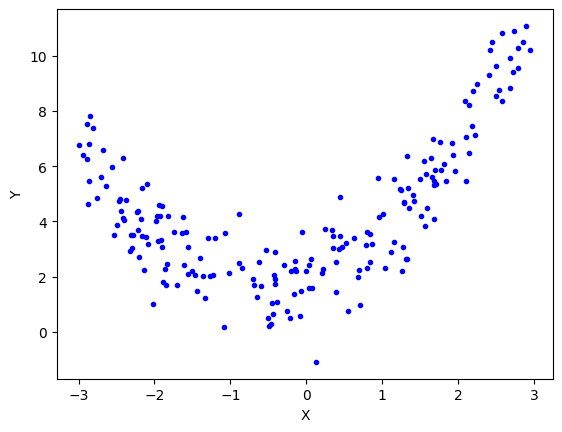

In [9]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [ ]:
#Apply linear regression on a non linear data set 
lr = LinearRegression()

In [17]:
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = lr.predict(X_test)
r2_score(Y_test ,y_pred)

0.21150533434872

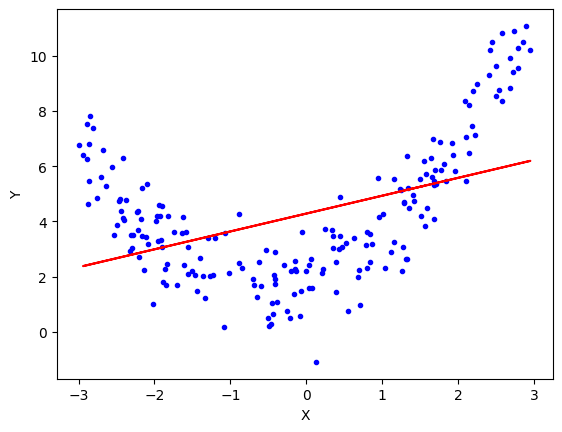

In [24]:
plt.plot(X,y,'b.')
plt.plot(X_train , lr.predict(X_train),color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [25]:
# now transform the input features in X_train and X_test into polynomial features 
poly = PolynomialFeatures(degree=2,include_bias=True) # degree is the hyperparamater 
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.fit_transform(X_test)

In [ ]:
X_train_trans[0] # for every X it create X^0,X^1,X^2     for deg = 2

array([1.        , 1.56210101, 2.44015955])

In [31]:
X_test_trans[0]

array([1.        , 2.79149287, 7.79243242])

In [34]:
lr = LinearRegression()
lr.fit(X_train_trans,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred = lr.predict(X_test_trans)
r2_score(Y_test,y_pred)

0.8848531977584897

In [39]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.82722836 0.80167348]]
[1.96825656]


In [ ]:
X_new = np.linspace(-3,3,200).reshape(200,1) # it spread the 200 evenly distributed pts between -3 & 3 
y_new =poly.transform(X_new)
y_pred_new = lr.predict(y_new)


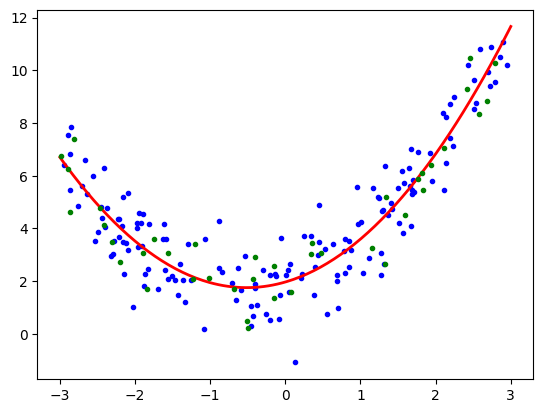

In [ ]:
plt.plot(X_train,Y_train,'.b',label='Training points')
plt.plot(X_new,y_pred_new,'r-',linewidth=2,label='predictions')
plt.plot(X_test,Y_test,'g.',label='testing points')
# plt.plot(X_train_trans,lr.predict(X_train_trans),'r-',label='predictions')
# plt.plot(X_test_trans,lr.predict(X_test_trans),'r-',label='predictions',color='blue')